In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.utils import check_array
from keras.models import load_model
from keras.layers import Bidirectional
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers import Dense,LSTM,Dropout,Activation
import os
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df=pd.read_csv('next_Alpha_Asia.csv',usecols=['cases'])

df.head()

cases
0  181014
1  194532
2  205489
3  209776
4  217207

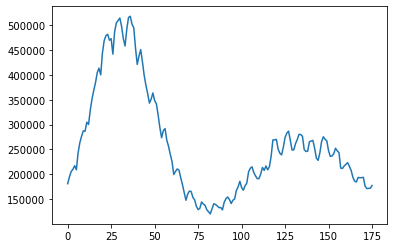

In [3]:
plt.plot(df)

In [6]:
df1=pd.read_csv('next_Alpha_Asia.csv',usecols=['cases'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1

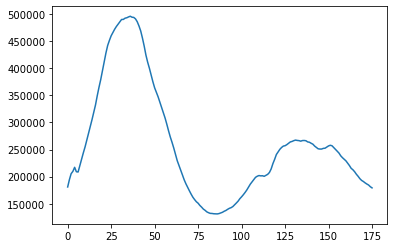

In [7]:
plt.plot(df)

In [8]:
train_df,test_df =df[1:int(0.60 * len(df))],df[int(0.60 * len(df)):] 

In [9]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_5304/3151536076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_5304/3151536076.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


In [10]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
    # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [73]:
n_past = 5
n_future =7
n_features = 1

In [74]:
X_train, y_train = split_series(train.values,n_past, n_future)

In [75]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [90]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 5, 1)]       0           []                               
                                                                                                  
 lstm_28 (LSTM)                 [(None, 5, 100),     40800       ['input_8[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_29 (LSTM)                 [(None, 100),        80400       ['lstm_28[0][0]']                
                                 (None, 100),                                               

In [94]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history=model.fit(X_train,y_train,epochs=100,validation_split = 0.2,batch_size=16,verbose=0)

In [43]:
model=load_model("LSTM_3dayscases.h5")
#model=model.save("LSTM_3dayscases.h5")

In [66]:
model=load_model("LSTM_5dayscases.h5")
#model=model.save("LSTM_5dayscases.h5")

In [97]:
model=load_model("LSTM_7dayscases.h5")
#model=model.save("LSTM_7dayscases.h5")

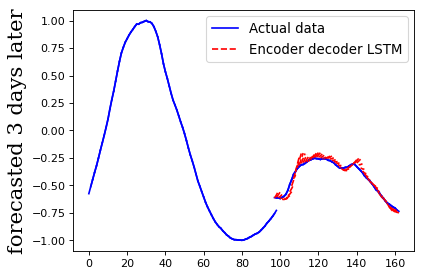

In [44]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred3LSTM=model.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred3LSTM[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 3 days later", fontdict = font1)
    plt.legend(['Actual data','Encoder decoder LSTM'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [45]:
#MAE
from sklearn.metrics import mean_absolute_error
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors))    

cases
Day  1 :
MAE-E2D2 :  0.013764905580422513
Day  2 :
MAE-E2D2 :  0.02635817725682049
Day  3 :
MAE-E2D2 :  0.04126295900680292


mean 0.027128680614681974


In [46]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.01905805776803221
Day  2 :
MAE-E2D2 :  0.03295116271212792
Day  3 :
MAE-E2D2 :  0.05082075758665971


mean 0.034276659355606615


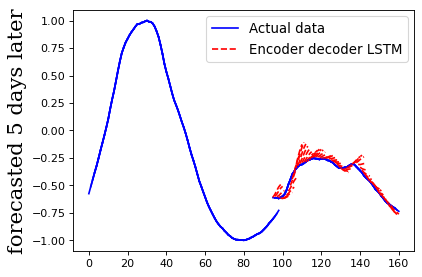

In [67]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred5LSTM=model.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred5LSTM[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 5 days later", fontdict = font1)
    plt.legend(['Actual data','Encoder decoder LSTM'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [68]:
#MAE
from sklearn.metrics import mean_absolute_error
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors))    

cases
Day  1 :
MAE-E2D2 :  0.01600355303553231
Day  2 :
MAE-E2D2 :  0.024910869902465597
Day  3 :
MAE-E2D2 :  0.0399714644238303
Day  4 :
MAE-E2D2 :  0.05580515037027099
Day  5 :
MAE-E2D2 :  0.07037715519163931


mean 0.041413638584747704


In [69]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.02026648951132929
Day  2 :
MAE-E2D2 :  0.031067589330654028
Day  3 :
MAE-E2D2 :  0.049290955498443464
Day  4 :
MAE-E2D2 :  0.06861997948097225
Day  5 :
MAE-E2D2 :  0.08584243927404962


mean 0.051017490619089736


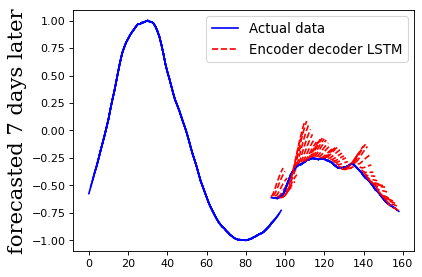

In [98]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred7LSTM=model.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred7LSTM[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 7 days later", fontdict = font1)
    plt.legend(['Actual data','Encoder decoder LSTM'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [99]:
#MAE
from sklearn.metrics import mean_absolute_error
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors))    

cases
Day  1 :
MAE-E2D2 :  0.017933599573640012
Day  2 :
MAE-E2D2 :  0.029508195008535652
Day  3 :
MAE-E2D2 :  0.05070605125823595
Day  4 :
MAE-E2D2 :  0.0760090125013053
Day  5 :
MAE-E2D2 :  0.10093318696981991
Day  6 :
MAE-E2D2 :  0.12327336750223217
Day  7 :
MAE-E2D2 :  0.14394037803927662


mean 0.07747197012186366


In [100]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



cases
Day  1 :
MAE-E2D2 :  0.021709740392212785
Day  2 :
MAE-E2D2 :  0.03501448864100459
Day  3 :
MAE-E2D2 :  0.060176830907826384
Day  4 :
MAE-E2D2 :  0.08958206943656961
Day  5 :
MAE-E2D2 :  0.11857417653431811
Day  6 :
MAE-E2D2 :  0.14519310592983614
Day  7 :
MAE-E2D2 :  0.1685952486566434


mean 0.0912636657854873


In [ ]:
###########Alpha deaths

In [106]:
df=pd.read_csv('next_Alpha_Asia.csv',usecols=['deaths'])

df.head()

deaths
0    1529
1    1316
2    1606
3    1784
4    1540

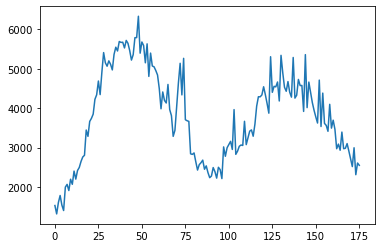

In [107]:
plt.plot(df)

In [109]:
df1=pd.read_csv('next_Alpha_Asia.csv',usecols=['deaths'])
window=7
rolling = df1.rolling(window)
df1 = rolling.mean()
for i in range(window-1):
    df1.iloc[i]=df.iloc[i]
df = df1

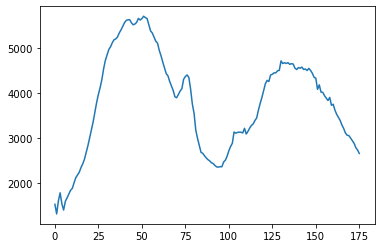

In [110]:
plt.plot(df)

In [111]:
train_df,test_df =df[1:int(0.60 * len(df))],df[int(0.60 * len(df)):] 

In [112]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_5304/3151536076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
C:\Users\SEPANT~1\AppData\Local\Temp/ipykernel_5304/3151536076.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[i]=s_s


In [113]:
def split_series(series, n_past, n_future):
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
    # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [153]:
n_past = 5
n_future =7
n_features = 1

In [154]:
X_train, y_train = split_series(train.values,n_past, n_future)

In [155]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [179]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 5, 1)]       0           []                               
                                                                                                  
 lstm_64 (LSTM)                 [(None, 5, 100),     40800       ['input_17[0][0]']               
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_65 (LSTM)                 [(None, 100),        80400       ['lstm_64[0][0]']                
                                 (None, 100),                                              

In [180]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,batch_size=16,verbose=0)

In [140]:
#model=load_model("LSTM_3days.h5")
#model=model.save("LSTM_3days.h5")

In [152]:
#model=load_model("LSTM_5days.h5")
model=model.save("LSTM_5days.h5")

In [184]:
model=load_model("LSTM_7days.h5")
#model=model.save("LSTM_7days.h5")

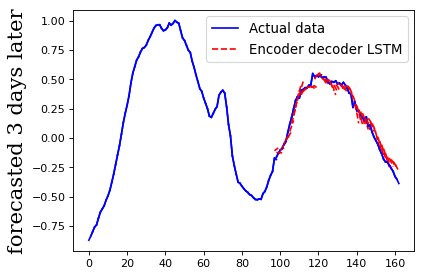

In [134]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred3LSTM=model.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred3LSTM[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 3 days later", fontdict = font1)
    plt.legend(['Actual data','Encoder decoder LSTM'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [135]:
#MAE
from sklearn.metrics import mean_absolute_error
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors))    

deaths
Day  1 :
MAE-E2D2 :  0.03772118490158566
Day  2 :
MAE-E2D2 :  0.036467496205265154
Day  3 :
MAE-E2D2 :  0.04752881130267752


mean 0.04057249746984278


In [136]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred3LSTM[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   



deaths
Day  1 :
MAE-E2D2 :  0.04763145287105898
Day  2 :
MAE-E2D2 :  0.04651234903559181
Day  3 :
MAE-E2D2 :  0.057645298826483164


mean 0.05059636691104465


In [ ]:
####5days

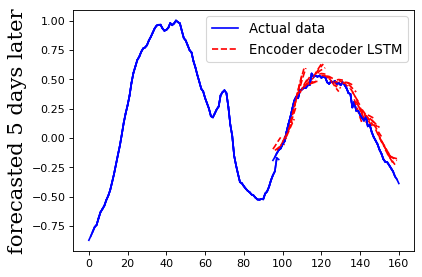

In [146]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred5LSTM=model.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred5LSTM[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 5 days later", fontdict = font1)
    plt.legend(['Actual data','Encoder decoder LSTM'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [147]:
#MAE
from sklearn.metrics import mean_absolute_error
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors))    

deaths
Day  1 :
MAE-E2D2 :  0.047304865433953326
Day  2 :
MAE-E2D2 :  0.05278572675658619
Day  3 :
MAE-E2D2 :  0.05933742037374905
Day  4 :
MAE-E2D2 :  0.06830533292244928
Day  5 :
MAE-E2D2 :  0.08127851166995136


mean 0.06180237143133784


In [148]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred5LSTM[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   


deaths
Day  1 :
MAE-E2D2 :  0.05956553785321166
Day  2 :
MAE-E2D2 :  0.06414647775749883
Day  3 :
MAE-E2D2 :  0.07218577291464845
Day  4 :
MAE-E2D2 :  0.08223428063095661
Day  5 :
MAE-E2D2 :  0.09636974003295833


mean 0.07490036183785478


In [ ]:
######7days

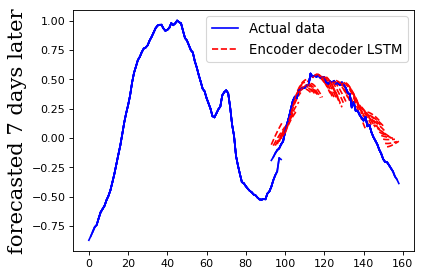

In [185]:
from matplotlib.pyplot import figure
figure(figsize=(5.5, 4), dpi=80)

pred7LSTM=model.predict(X_test)
font1 = {'family':'Serif','color':'black','size':19}


for i in range(len(y_test)):
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),y_test[i],"blue")
    plt.plot(range(i+len(y_train),i+len(y_train)+n_future),pred7LSTM[i],"red",linestyle='dashed')
    #plt.title("Encoder decoder LSTM", fontdict = font1)
    #plt.xlabel("days")   
    plt.ylabel("forecasted 7 days later", fontdict = font1)
    plt.legend(['Actual data','Encoder decoder LSTM'],fontsize=12)
    
for i in range(len(y_train)):
    plt.plot(range(i,i+n_future),y_train[i],"blue")

In [186]:
#MAE
from sklearn.metrics import mean_absolute_error
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index]))
        errors=np.append(errors,mean_absolute_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index]))
    print()
    print()
print("mean",np.mean(errors))    

deaths
Day  1 :
MAE-E2D2 :  0.057320217570596806
Day  2 :
MAE-E2D2 :  0.06402592935318134
Day  3 :
MAE-E2D2 :  0.07271340992641134
Day  4 :
MAE-E2D2 :  0.0825002381686205
Day  5 :
MAE-E2D2 :  0.09561476110359497
Day  6 :
MAE-E2D2 :  0.10883823185501666
Day  7 :
MAE-E2D2 :  0.12422869984234056


mean 0.08646306968853745


In [187]:
#RMSE
errors=[]
for index,i in enumerate(train_df.columns):
    print(i)
    for j in range(1,n_future+1):
        print("Day ",j,":")
        print("MAE-E2D2 : ",math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index])))
        errors=np.append(errors,math.sqrt(mean_squared_error(y_test[:,j-1,index],pred7LSTM[:,j-1,index])))
    print()
    print()
print("mean",np.mean(errors))   


deaths
Day  1 :
MAE-E2D2 :  0.07620978953922068
Day  2 :
MAE-E2D2 :  0.08565355250875827
Day  3 :
MAE-E2D2 :  0.09653399088287627
Day  4 :
MAE-E2D2 :  0.10828916836824816
Day  5 :
MAE-E2D2 :  0.12237388859510813
Day  6 :
MAE-E2D2 :  0.13628945876550325
Day  7 :
MAE-E2D2 :  0.15296836505891756


mean 0.11118831624551888
